In [174]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [175]:
#Import data from csv files
madden_df = pd.read_csv('madden_25_ratings.csv')
stats_off = pd.read_csv('player_stats_season.csv')
stats_def = pd.read_csv('player_stats_def_season.csv')
#Offense and defense dataframes from the last 3 seasons before Madden 25
stats_off = stats_off[stats_off['season'].isin([2021, 2022, 2023])]
stats_def = stats_def[stats_def['season'].isin([2021, 2022, 2023])]
#Remove offense/defense players that show up the defense/offense dataframes
stats_off = stats_off[~stats_off['position_group'].isin(['DB', 'LB', 'DL', 'SPEC'])]
stats_def = stats_def[~stats_def['position_group'].isin(['QB', 'OL', 'WR', 'RB', 'TE', 'SPEC'])]


In [176]:
#Creates a dataframes with just 2023 data
stats_2023_off = stats_off[stats_off['season'].isin([2023])]
stats_2023_def = stats_def[stats_def['season'].isin([2023])]

In [ ]:
#Creates a column with the full name of the player, generated using Copilot.
madden_df['fullName'] = 0
for i in range(len(madden_df)):
    madden_df['fullName'][i] = madden_df['firstName'][i] + ' ' + madden_df['lastName'][i]

C:\Users\ogali\AppData\Local\Temp\ipykernel_19604\1890892672.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  madden_df['fullName'][i] = madden_df['firstName'][i] + ' ' + madden_df['lastName'][i]
C:\Users\ogali\AppData\Local\Temp\ipykerne

In [178]:
#Combines the Madden and Stats dataframes
stats_2023_off_madden = stats_2023_off.merge(madden_df, how='left', left_on=['player_display_name'], right_on=['fullName'])
stats_2023_def_madden = stats_2023_def.merge(madden_df, how='left', left_on=['player_display_name'], right_on=['fullName'])


In [179]:
#Checks if there are any people with the same name, generated with Copilot.
duplicate_names_off = stats_2023_off_madden[stats_2023_off_madden['season_type'] == 'REG']
duplicate_names_def = stats_2023_def_madden[stats_2023_def_madden['season_type'] == 'REG']
duplicate_names_off = duplicate_names_off['fullName'].value_counts()[duplicate_names_off['fullName'].value_counts() > 1]
duplicate_names_def = duplicate_names_def['fullName'].value_counts()[duplicate_names_def['fullName'].value_counts() > 1]
#Names of players with the same name (Josh Allen and Josh Allen or Lamar Jackson and Lamar Jackson) were renamed in the csv file.
duplicate_names_def
#These represent players that switched teams during the season, will need to decide what to do with them.



fullName
Malcolm Rodriguez       2
Amani Hooker            2
Jonah Williams          2
Naquan Jones            2
Jaylinn Hawkins         2
Quinton Bohanna         2
Shaquill Griffin        2
Kindle Vildor           2
Byron Young             2
Chase Young             2
Ameer Speed             2
Terrell Edmunds         2
Randy Gregory           2
Leonard Williams        2
Keondre Coburn          2
K'Von Wallace           2
Sebastian Joseph-Day    2
Derek Barnett           2
Rasul Douglas           2
Teair Tart              2
Kentavius Street        2
Jack Jones              2
Marco Wilson            2
Montez Sweat            2
Name: count, dtype: int64

In [180]:
#Dataframe of regular season qb stats
stats_2023_qb = stats_2023_off_madden[stats_2023_off_madden['position'] == 'QB']
stats_2023_qb_reg = stats_2023_qb[stats_2023_qb['season_type'] == 'REG']
stats_2023_qb_reg = stats_2023_qb_reg[['games', 'completions', 'attempts', 'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch', 'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa', 'Age', 'Overall', 'fullName']]
stats_2023_qb_reg = stats_2023_qb_reg.dropna()
stats_2023_qb_reg

,games,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_fumbles,sack_fumbles_lost,passing_air_yards,...,carries,rushing_yards,rushing_tds,rushing_fumbles,rushing_fumbles_lost,rushing_first_downs,rushing_epa,Age,Overall,fullName
2,5,123,204,1616,13,8,8,3,1,1910,...,9,2,0,1,0,3,-0.469946,39.0,72.0,Joe Flacco
3,15,326,521,3965,24,11,30,0,0,4033,...,21,65,0,0,0,4,3.965635,36.0,83.0,Matthew Stafford
8,2,34,58,361,2,0,3,0,0,477,...,3,12,0,0,0,2,1.428460,36.0,72.0,Andy Dalton
10,10,116,180,1341,5,3,17,2,0,1541,...,38,197,0,2,0,10,-0.412837,35.0,68.0,Tyrod Taylor
11,2,34,53,291,1,3,6,0,0,377,...,2,1,0,1,0,0,-1.650933,36.0,63.0,Case Keenum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,3,13,20,168,0,1,4,2,2,156,...,6,14,0,0,0,0,-1.966020,26.0,59.0,Jaren Hall
558,16,315,527,2877,11,10,62,9,6,4009,...,39,253,0,2,0,18,21.616300,23.0,73.0,Bryce Young
559,9,149,255,1808,8,4,28,5,2,2688,...,25,57,1,2,2,7,-9.428327,25.0,72.0,Will Levis
560,15,319,499,4108,23,5,38,6,3,4481,...,39,157,3,2,1,17,6.004496,22.0,81.0,C.J. Stroud


In [181]:
#Creating features and targets
X = stats_2023_qb_reg[['games', 'completions', 'attempts', 'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch', 'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa', 'Age']]
y = stats_2023_qb_reg['Overall']

model coefficients: [ -0.78383247  -4.0037427   29.71601618 -14.34342449   3.42063195
   0.93533428   0.11922984  -2.38110175   2.05127815  -2.56300571
   3.08270922 -10.50561179   6.48870959  -0.70407113   4.11751159
   3.02709152  -0.21938696   0.33072587  -1.32062865  -2.21783991
  -1.6888533    0.46348659], 70.25
R2_test = 0.57, R2_train = 0.77


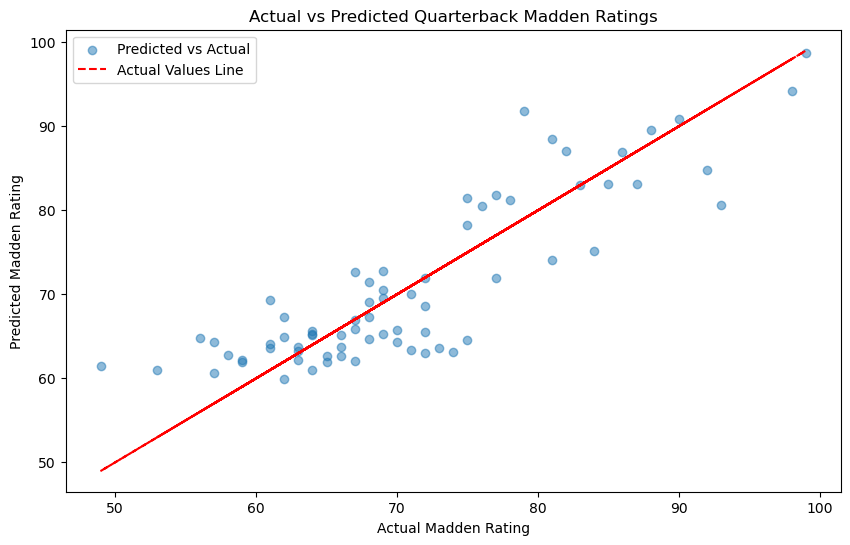

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the features
ss = StandardScaler()
ss.fit(X_train)
X_scaled_train = ss.transform(X_train)
X_scaled_test = ss.transform(X_test)

# Fit the model
model_linreg = LinearRegression()
model_linreg.fit(X_scaled_train, y_train)

# Make predictions
y_pred_train = model_linreg.predict(X_scaled_train)
y_pred_test = model_linreg.predict(X_scaled_test)
y_pred = model_linreg.predict(ss.transform(X))

# Assess the model
R2_train = model_linreg.score(X_scaled_train, y_train)
R2_test = model_linreg.score(X_scaled_test, y_test)
print(f'model coefficients: {model_linreg.coef_}, {model_linreg.intercept_}')
print(f'R2_test = {R2_test:.2f}, R2_train = {R2_train:.2f}')


# Plotting the actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot(y, y, color='red', linestyle='--', label='Actual Values Line')
plt.xlabel('Actual Madden Rating')
plt.ylabel('Predicted Madden Rating')
plt.title('Actual vs Predicted Quarterback Madden Ratings')
plt.legend()
plt.show()

In [183]:
#Which quarterbacks were rated differently from their Madden rating?
qb_comparison_df = pd.DataFrame({
    'fullName': stats_2023_qb_reg['fullName'], 
    'Overall': stats_2023_qb_reg['Overall'],  
    'PredictedOverall': y_pred
})


In [188]:
qb_comparison_df

,fullName,Overall,PredictedOverall
2,Joe Flacco,72.0,68.575658
3,Matthew Stafford,83.0,83.044370
8,Andy Dalton,72.0,65.533540
10,Tyrod Taylor,68.0,71.524049
11,Case Keenum,63.0,63.670277
...,...,...,...
502,Jaren Hall,59.0,62.192522
558,Bryce Young,73.0,63.623901
559,Will Levis,72.0,63.022109
560,C.J. Stroud,81.0,74.059044


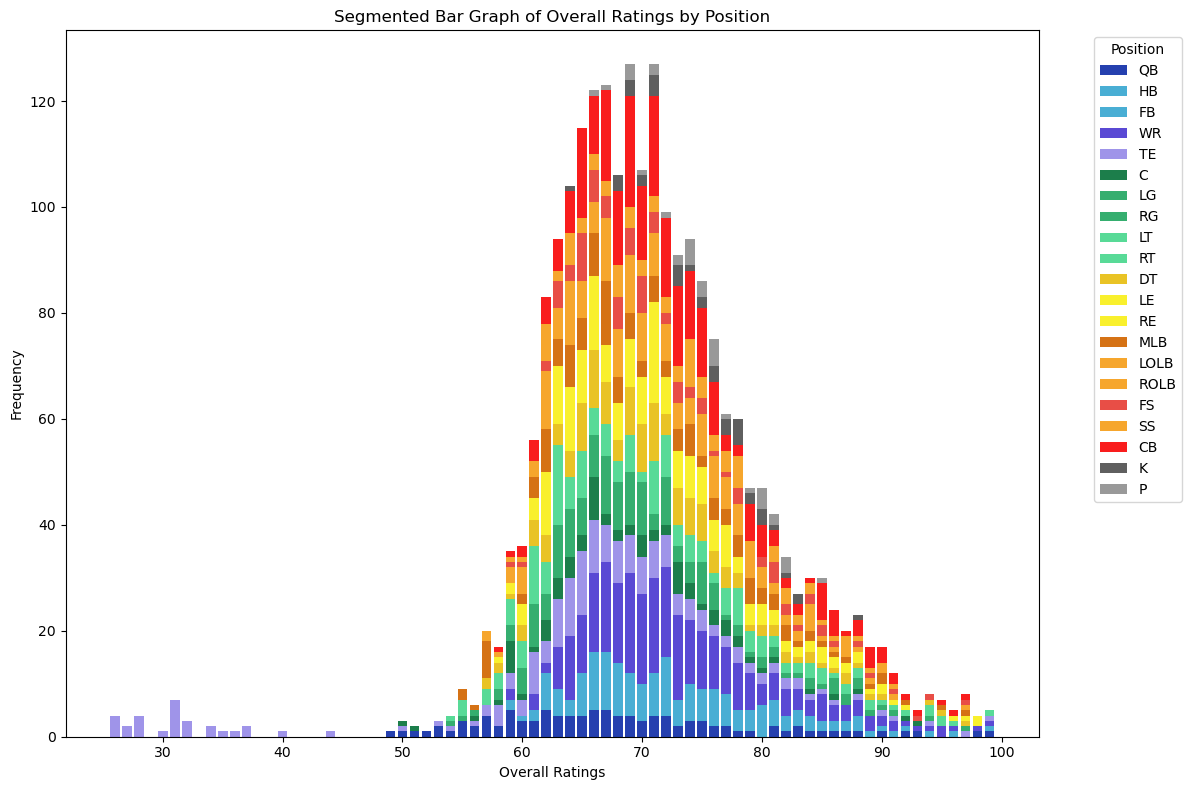

In [ ]:
color_df = madden_df[['Position', 'Overall']]
color_df['Position'].unique()

positions = ['QB', 'HB', 'FB', 'WR', 'TE', 'C', 'LG', 'RG', 'LT', 'RT', 'DT', 'LE', 'RE', 
             'MLB', 'LOLB', 'ROLB', 'FS', 'SS', 'CB', 'K', 'P']
hex_colors = [
    '#2540af', '#49aed4', '#49aed4', '#5a49d4', '#9f94e9', '#1c7e4b', '#35ae6f', 
    '#35ae6f', '#58da97', '#58da97', '#e9c325', '#f9f02d', '#f9f02d', '#d57215', 
    '#f6a62d', '#f6a62d', '#e84e46', '#f6a62d', '#f91d1d', '#5f5f5f', '#999999'
]

positions_color_df = pd.DataFrame({
    'Position': positions,
    'HexColor': hex_colors
})

color_df = color_df.merge(positions_color_df, how='left', left_on=['Position'], right_on=['Position'])
#Following here the code was generated using Copilot
# Define the desired order of positions
ordered_positions = ['QB', 'HB', 'FB', 'WR', 'TE', 'C', 'LG', 'RG', 'LT', 'RT', 
                     'DT', 'LE', 'RE', 'MLB', 'LOLB', 'ROLB', 'FS', 'SS', 'CB', 'K', 'P']

# Sort the color_df DataFrame based on the desired order
color_df['Position'] = pd.Categorical(color_df['Position'], categories=ordered_positions, ordered=True)
sorted_color_df = color_df.sort_values('Position')

# Get unique overall values and sort them
overall_values = sorted(sorted_color_df['Overall'].unique())

# Initialize a dictionary to store counts for each position at each overall value
position_counts = {position: [0] * len(overall_values) for position in ordered_positions}

# Populate the counts
for i, overall in enumerate(overall_values):
    for position in ordered_positions:
        position_counts[position][i] = len(sorted_color_df[(sorted_color_df['Overall'] == overall) & (sorted_color_df['Position'] == position)])

# Create a segmented bar graph
plt.figure(figsize=(12, 8))
bottom = np.zeros(len(overall_values))  # Initialize the bottom for stacking bars

for position in ordered_positions:
    plt.bar(
        overall_values, 
        position_counts[position], 
        bottom=bottom, 
        label=position, 
        color=sorted_color_df[sorted_color_df['Position'] == position]['HexColor'].iloc[0]
    )
    bottom += position_counts[position]  # Update the bottom for the next position

# Add labels, legend, and title
plt.xlabel('Overall Ratings')
plt.ylabel('Frequency')
plt.title('Segmented Bar Graph of Overall Ratings by Position')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [186]:
#For final project:
# Create regression lines for all posistion groups
# Average/sum stats for the years 2021, 2022, and 2023 to get a more accurate rating
# See where the model doesn't match the Madden ratings